# Shapley on basic funcs
Lets do shapley on a 2 basic functions. Namely 
$$z=x-y$$
and $$z=x.y$$

In [18]:
def func_1(X):
    x = X[:,0]
    y = X[:,1]
    return x-y

def func_2(X):
    x = X[:,0]
    y = X[:,1]
    return x*y

def func_3(X):
    x = X[:,0]
    y = X[:,1]
    return x**2+np.sin(y*x)

def func_4(X):
    x = X[:,0]
    y = X[:,1]
    z = X[:,2]
    return x**2+y*z

#defining the shap
def explain(func,X_data):
    explainer = shap.KernelExplainer(func,X_data)
    shap_values = explainer.shap_values(X_data)
    shap.summary_plot(shap_values,X_data)
    shap.dependence_plot(0,shap_values,X_data)
    shap.dependence_plot(1,shap_values,X_data)
    shap.dependence_plot(2,shap_values,X_data)
    return shap_values

import numpy as np
import matplotlib.pyplot as plt
import shap
import random

#generate data
x_points = np.linspace(0,1,25)
y_points = np.linspace(0,1,25)
z_points = np.linspace(0,1,25)
x_points,y_points,z_points= np.meshgrid(x_points,y_points,z_points)
x_points = x_points.reshape(1,-1)
y_points = y_points.reshape(1,-1)
z_points = z_points.reshape(1,-1)
X_points = np.transpose(np.vstack([x_points,y_points,z_points]))

# Select points at random
indices = [random.randint(0,9999) for _ in range(200)]
X_data = X_points[indices]



In [19]:
X_points

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.04166667],
       [0.        , 0.        , 0.08333333],
       ...,
       [1.        , 1.        , 0.91666667],
       [1.        , 1.        , 0.95833333],
       [1.        , 1.        , 1.        ]])

In [20]:
10000**0.333333

21.54428075683102

In [21]:
X_points

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.04166667],
       [0.        , 0.        , 0.08333333],
       ...,
       [1.        , 1.        , 0.91666667],
       [1.        , 1.        , 0.95833333],
       [1.        , 1.        , 1.        ]])

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

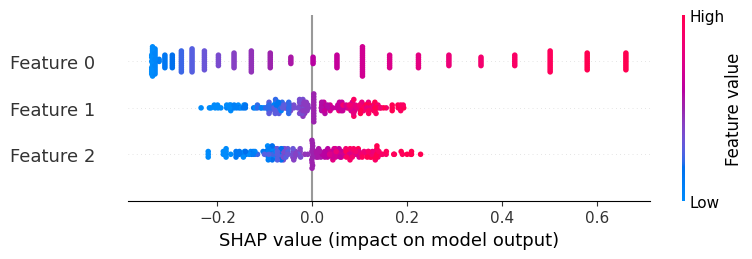

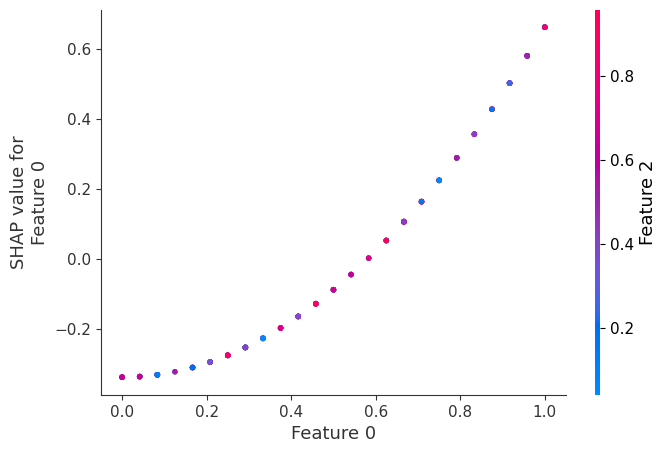

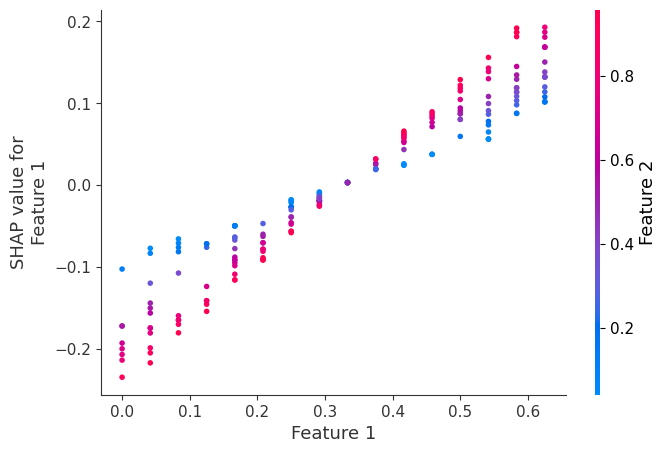

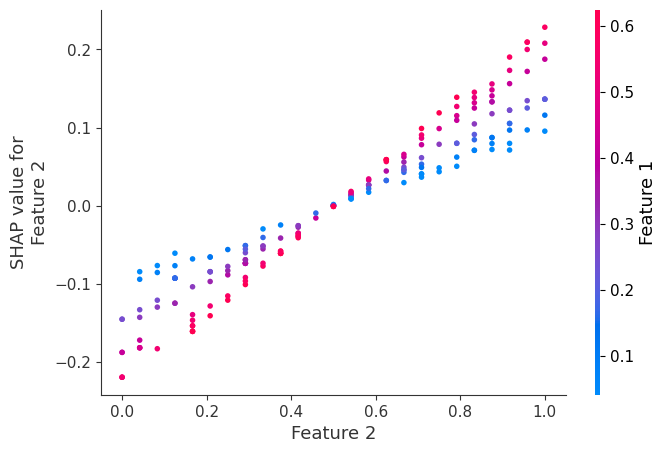

In [22]:
shap_values = explain(func_4,X_data)

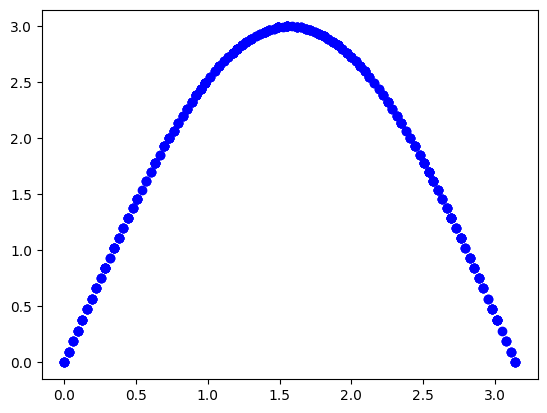

In [179]:
plt.scatter(X_data[:,0],func_4(X_data),c="b")

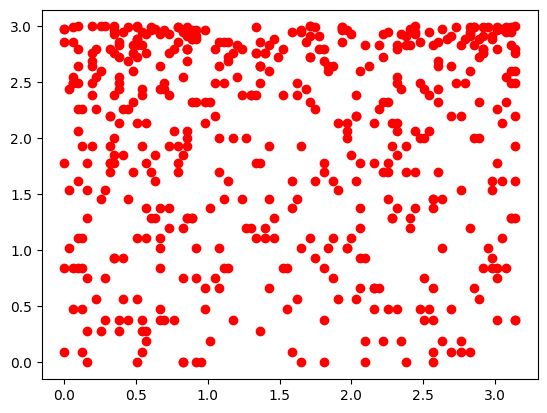

In [180]:
plt.scatter(X_data[:,1],func_4(X_data),c="r")

In [186]:
3-6/np.pi

1.090140682897256

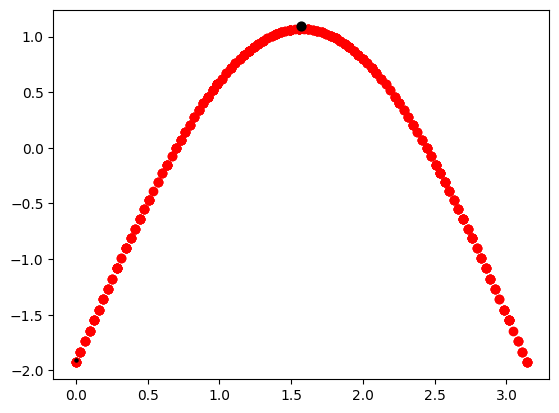

In [191]:
plt.scatter(X_data[:,0],shap_values[:,0],c="r")
plt.scatter(0,-6/np.pi,c="k",s = 5)
plt.scatter(np.pi/2,3-6/np.pi,c="k",s = 40)

Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/500 [00:00<?, ?it/s]

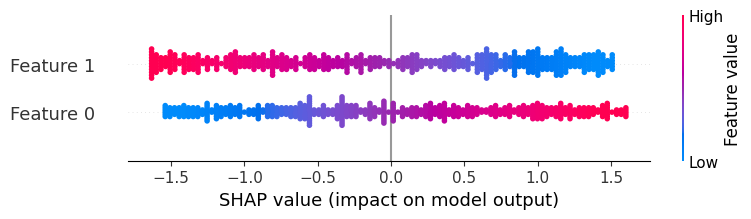

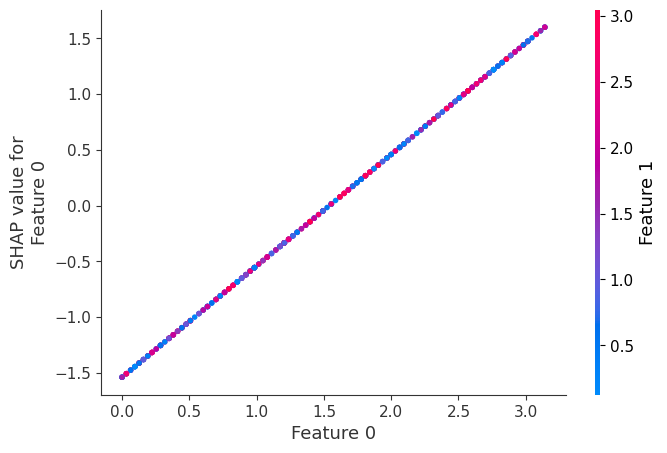

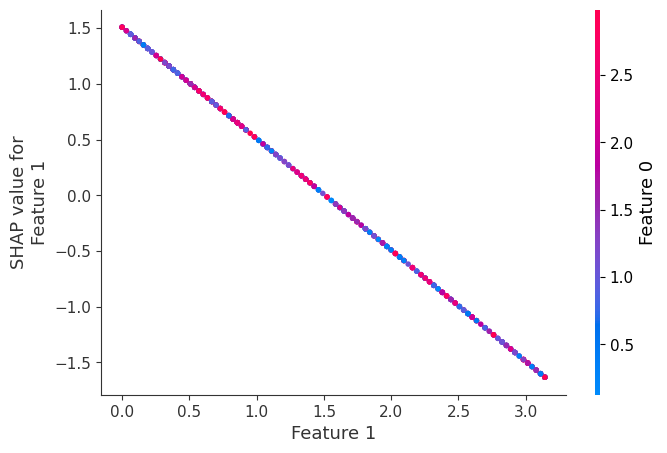

In [192]:
shap_values = explain(func_1,X_data)

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

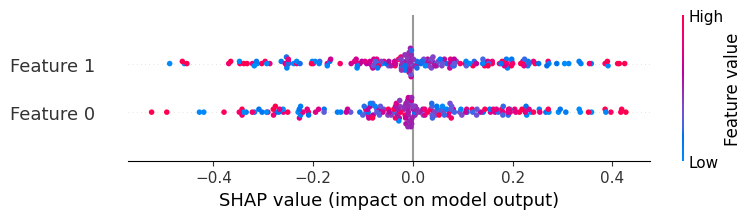

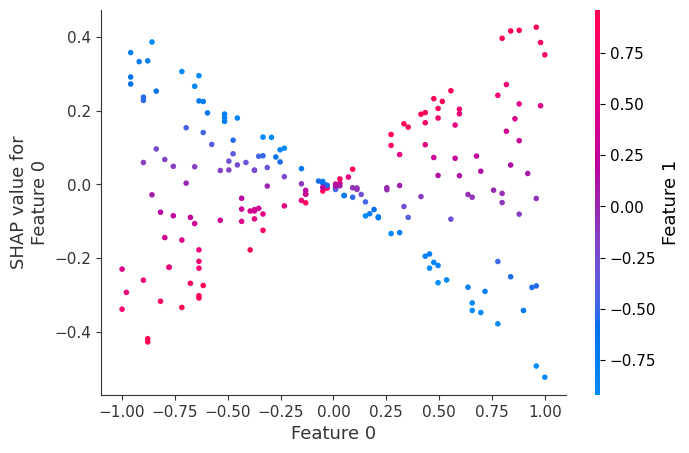

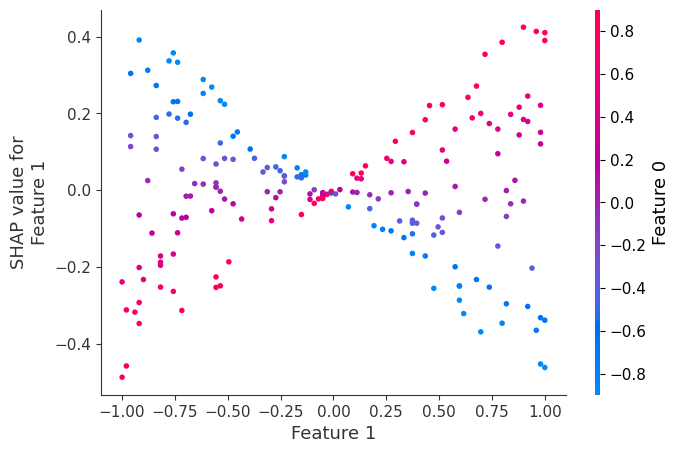

In [199]:
shap_values = explain(func_2,X_data)

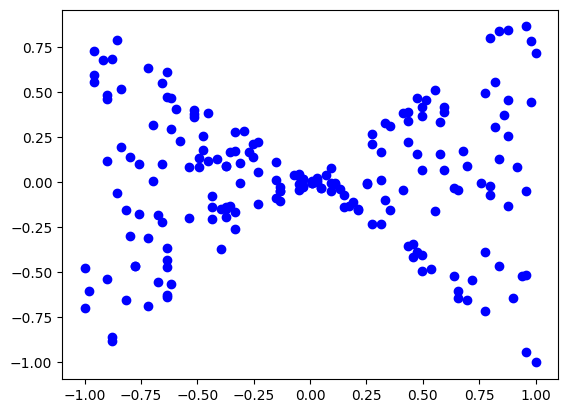

In [202]:
plt.scatter(X_data[:,0],func_2(X_data),c="b")

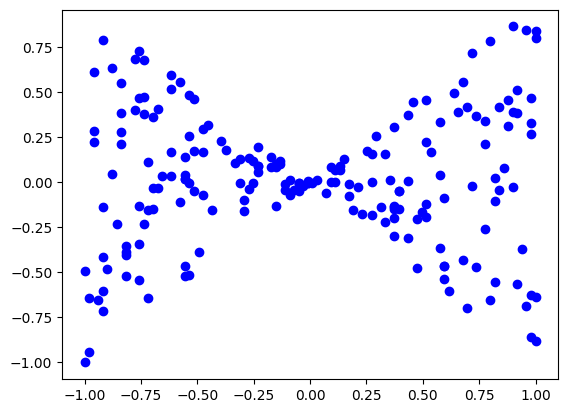

In [203]:
plt.scatter(X_data[:,1],func_2(X_data),c="b")

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

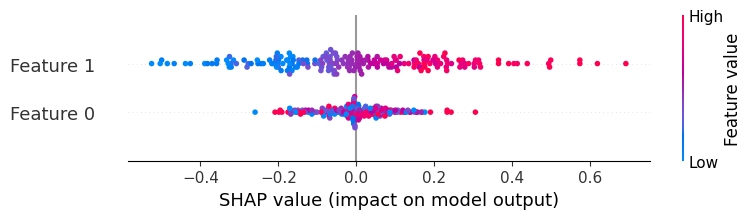

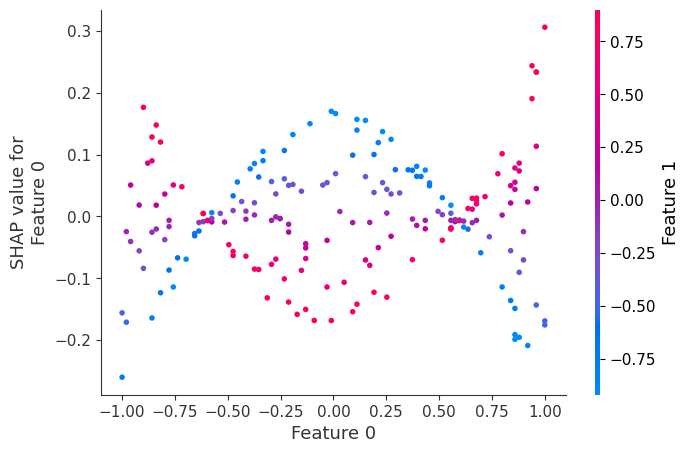

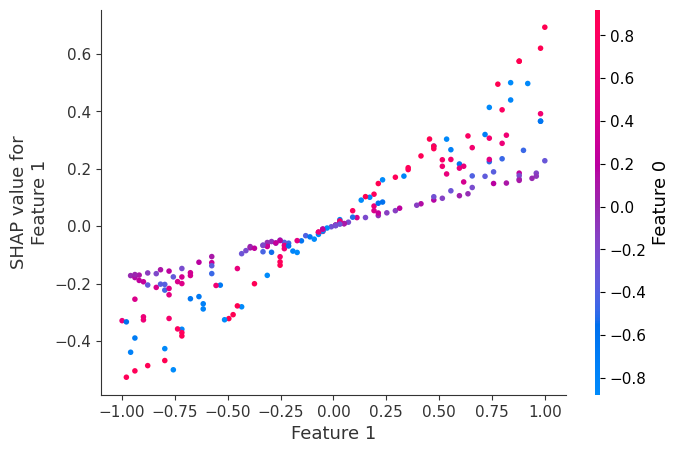

In [209]:
shap_values = explain(func_3,X_data,feature_)